In [50]:
import numpy as np 
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

In [51]:
class pca(BaseEstimator,TransformerMixin):
    def __init__(self,k=2):
        self.k=k 


    def fit(self,X):
        self.sc_=StandardScaler()
        X_std=self.sc_.fit_transform(X)


        cov_matrix=np.cov(X_std.T)

        eigen_val,eigen_vec=np.linalg.eig(cov_matrix)

        eigen_pair=[(np.abs(eigen_val[i]),eigen_vec[:,i]) for i in range(len(eigen_val))]

        eigen_pair=sorted(eigen_pair,key=lambda x:x[0],reverse=True)

        self.W_=np.hstack([eigen_pair[i][1][:,np.newaxis] for i in range(self.k)])

        return self 
    

    def transform(self,X):
        X=self.sc_.transform(X)
        return np.dot(X,self.W_)

In [52]:
import pandas as pd 
df_wine=pd.read_csv(r'D:\Python machine learning\datasets\wine\wine.data')
df_wine.columns=['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline'] 
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [53]:
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

pc=pca(k=2)
X_train_pca=pc.fit_transform(X_train)
X_test_pca=pc.transform(X_test)

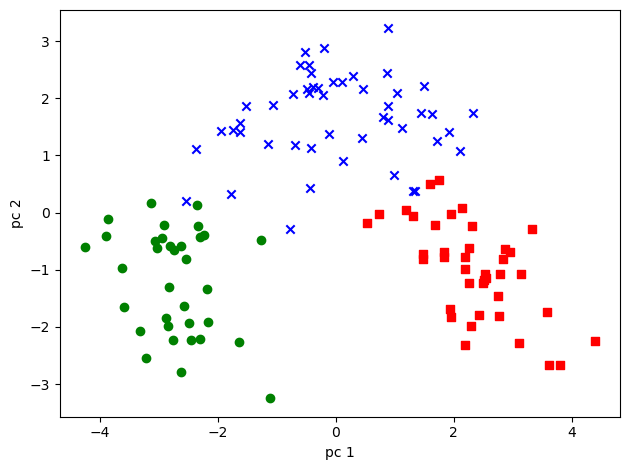

In [54]:
import matplotlib.pyplot as plt
color=['r','b','g']
markers=['s','x','o']

for l,c,m in zip(np.unique(y_train),color,markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c=c,marker=m)

plt.xlabel('pc 1')
plt.ylabel('pc 2')
# plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
